# Data analysis for all data collected during our project
 

#### imports and  loading Data 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from operator import itemgetter

dfQuick16 = pd.read_csv("CleanData/QuickClean-PC16.csv")

dfRead16 = pd.read_csv("CleanData/ReadCSVClean-PC16.csv")
dfQuick16.head()

,PKG (J),CPU (J),DRAM (J),Time (ms),Temp (C),Input case,Size
0,1.623169,1.355042,0.104736,210.359,60.0,best,25000.0
1,1.573853,1.350586,0.090576,175.050,60.0,best,25000.0
2,1.521057,1.276001,0.093689,197.807,60.0,best,25000.0
3,1.693542,1.455139,0.098450,176.312,60.0,best,25000.0
4,1.491455,1.241211,0.095825,205.452,60.0,best,25000.0


In [ ]:
dfRead16.head()

,PKG (J),CPU (J),DRAM (J),Time (ms),Temp (C),Input case,Size
0,2.240601,1.966187,0.134399,227.880,53.0,random1,25000
1,2.062317,1.775085,0.126160,250.212,53.0,random1,25000
2,2.140869,1.876709,0.121887,222.526,53.0,random1,25000
3,2.217102,1.940735,0.133545,226.620,53.0,random1,25000
4,2.058533,1.796814,0.119385,219.516,53.0,random1,25000


In [ ]:
def calcMean(df,type,size):
    meandf = df[df["Input case"] == type][df["Size"]==size].mean()
    meandf["Input case"] = type
    return meandf

def mean_of_dataset(df):
    s = [25000,50000,75000,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000]
    c = ["best", "worst", "random1","random2","random3","random4","random5","random6","random7","random8","random9","random10",]
    l = []
    for case in c:
        if case != "worst":
            for size in s:
                l.append(calcMean(df, case, size))  
        else :
            for size in [25000,50000,75000,100000,200000,300000,400000,500000]:
                l.append(calcMean(df, case, size))   
    
    dfMeans = pd.concat([series.to_frame().T for series in l], ignore_index=True)
    return dfMeans

dfQuickMean16 = mean_of_dataset(dfQuick16)
dfQuickMean16.head()

C:\Users\langk\AppData\Local\Temp\ipykernel_18192\1750124837.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  meandf = df[df["Input case"] == type][df["Size"]==size].mean()
C:\Users\langk\AppData\Local\Temp\ipykernel_18192\1750124837.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  meandf = df[df["Input case"] == type][df["Size"]==size].mean()
C:\Users\langk\AppData\Local\Temp\ipykernel_18192\1750124837.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  meandf = df[df["Input case"] == type][df["Size"]==size].mean()
C:\Users\langk\AppData\Local\Temp\ipykernel_18192\1750124837.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only v

,PKG (J),CPU (J),DRAM (J),Time (ms),Temp (C),Size,Input case
0,1.608216,1.373703,0.095435,182.941292,58.860058,25000.0,best
1,2.17316,1.875846,0.130221,227.230204,61.48048,50000.0,best
2,2.709955,2.350668,0.16293,270.17776,63.833333,75000.0,best
3,3.152814,2.736709,0.190366,312.319544,66.0,100000.0,best
4,4.239948,3.68638,0.251734,416.208058,67.142424,200000.0,best


In [ ]:

def list_of_case(df):
    l = []
    for i in range(len(df)):
        if df["Input case"].iloc[i] not in l:
            l.append(df["Input case"].iloc[i])
    return l


def mean_of_dataset_readCSV(df):
    s = [25000,50000,75000,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000]
    c = list_of_case(df)
    l = []
    for case in range(len(c)):
        for size in range(len(s)):
            l.append(calcMean(df, c[case], s[size]))  

    dfMeans = pd.concat([series.to_frame().T  for series in l], ignore_index=True)
    return dfMeans

dfReadMean16 = mean_of_dataset_readCSV(dfRead16)


C:\Users\langk\AppData\Local\Temp\ipykernel_18192\1750124837.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  meandf = df[df["Input case"] == type][df["Size"]==size].mean()
C:\Users\langk\AppData\Local\Temp\ipykernel_18192\1750124837.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  meandf = df[df["Input case"] == type][df["Size"]==size].mean()
C:\Users\langk\AppData\Local\Temp\ipykernel_18192\1750124837.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  meandf = df[df["Input case"] == type][df["Size"]==size].mean()
C:\Users\langk\AppData\Local\Temp\ipykernel_18192\1750124837.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only v

In [ ]:
dfQuickMean16 = dfQuickMean16.reset_index(drop=True)
dfReadMean16 = dfReadMean16.reset_index(drop=True)
dfQuickMean16.head()

,PKG (J),CPU (J),DRAM (J),Time (ms),Temp (C),Size,Input case
0,1.608216,1.373703,0.095435,182.941292,58.860058,25000.0,best
1,2.17316,1.875846,0.130221,227.230204,61.48048,50000.0,best
2,2.709955,2.350668,0.16293,270.17776,63.833333,75000.0,best
3,3.152814,2.736709,0.190366,312.319544,66.0,100000.0,best
4,4.239948,3.68638,0.251734,416.208058,67.142424,200000.0,best


In [ ]:
def getIndex(df,case,size):
    return df[df["Input case"] == case][df["Size"]==size].index.tolist()[0]

In [ ]:
def deductReadFromAlg(meanC, meanR):
    lc = []
    lt = []
    lm = []

    for i in range(len(meanC["Size"])):
        case = meanC["Input case"][i]
        size = meanC["Size"][i]
        if case == "best":
                case2 = "quickbest"
        if case == "worst":
            case2 = "reversesorted"
        if case.startswith("random"):
            case2 = "random"+case.split("m")[-1]

        Cc = meanC[meanC["Input case"] == case][meanC["Size"]==size]["CPU (J)"][meanC[meanC["Input case"] == case][meanC["Size"]==size]["CPU (J)"].index.tolist()[0]]
        Rc = meanR[meanR["Input case"] == case2][meanR["Size"]==size]["CPU (J)"][meanR[meanR["Input case"] == case2][meanR["Size"]==size]["CPU (J)"].index.tolist()[0]]
        lc.append(Cc-Rc)

        Ct = meanC[meanC["Input case"] == case][meanC["Size"]==size]["Time (ms)"][meanC[meanC["Input case"] == case][meanC["Size"]==size]["Time (ms)"].index.tolist()[0]]
        Rt = meanR[meanR["Input case"] == case2][meanR["Size"]==size]["Time (ms)"][meanR[meanR["Input case"] == case2][meanR["Size"]==size]["Time (ms)"].index.tolist()[0]]
        lt.append(Ct-Rt)

        Cm = meanC[meanC["Input case"] == case][meanC["Size"]==size]["DRAM (J)"][meanC[meanC["Input case"] == case][meanC["Size"]==size]["DRAM (J)"].index.tolist()[0]]
        Rm = meanR[meanR["Input case"] == case2][meanR["Size"]==size]["DRAM (J)"][meanR[meanR["Input case"] == case2][meanR["Size"]==size]["DRAM (J)"].index.tolist()[0]]
        lm.append(Cm-Rm)

    meanC["CPU - readCSV"] = lc
    meanC["Time - readCSV"] = lt
    meanC["Memory - readCSV"] = lm


deductReadFromAlg(dfQuickMean16, dfReadMean16)




C:\Users\langk\AppData\Local\Temp\ipykernel_18192\4094939665.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Cc = meanC[meanC["Input case"] == case][meanC["Size"]==size]["CPU (J)"][meanC[meanC["Input case"] == case][meanC["Size"]==size]["CPU (J)"].index.tolist()[0]]
C:\Users\langk\AppData\Local\Temp\ipykernel_18192\4094939665.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Rc = meanR[meanR["Input case"] == case2][meanR["Size"]==size]["CPU (J)"][meanR[meanR["Input case"] == case2][meanR["Size"]==size]["CPU (J)"].index.tolist()[0]]
C:\Users\langk\AppData\Local\Temp\ipykernel_18192\4094939665.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Ct = meanC[meanC["Input case"] == case][meanC["Size"]==size]["Time (ms)"][meanC[meanC["Input case"] == case][meanC["Size"]==size]["Time (ms)"].index.tolist()[0]]
C:\Users\langk\AppData\Local\Temp\ipykernel_18192\4094939665.py:21: UserWarning: B

# PLOTS

In [ ]:
# For bubblesort: polynomial regression
def polyReg(SeriesX, SeriesY,dg, Label, color, plotLabel = True, regLine=True, printR2Score = True, plotGraph = True, dots="o"):
    X = SeriesX.values.reshape(SeriesX.size, -1)
    y = SeriesY.values

    fitness = []
   #for dg in range(minDegrees, maxDegrees):
    # Create an empty polynomial function with degree of 4
    poly_reg = PolynomialFeatures(degree=dg)
    
    # Fit the function to the X and transform X to the polynomial format
    X_poly = poly_reg.fit_transform(X)

    # Now we construct a Multiple Linear Regressor on the transformed X_ploy
    lr_2 = LinearRegression()  
    lr_2.fit(X_poly, y)  
    
    # Get the y values using the constructed Multiple Linear Regressor
    y_poly = lr_2.predict(X_poly)
    
    r2 = metrics.r2_score(y,y_poly)
    #if printR2Score:
    #    print(f"r2_score for {Label} {dg} is: {r2}")
    fitness.append((f"poly {dg}dg", r2, y_poly))
    #print(f"Parameters of poly: {poly_reg.get_params()}") #does not give what we are looking for
    
    if plotGraph:
        plt.plot(X, y,dots, color=color,markersize=10)
        if r2 > 0.5 and regLine:
            plt.plot(X, y_poly, color=color, linewidth=2)
        #plt.legend(loc='upper left')
    #print(lr_2.intercept_, lr_2.coef_)
    return max(fitness,key=itemgetter(1))

In [ ]:
import math
def calcPercent(df):
    cpuPercent = []
    pkgPercent = []
    fullEC = []
    nlogn = []
    n2 = []
    for case in ["best", "worst", "random"]:
        if case == "best":
            for size in [25000,50000,75000,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000]:
                cpuPercent.append(df["CPU (J)"][getIndex(df,case,size)] / df["PKG (J)"][getIndex(df,case,size)] * 100)
                pkgPercent.append(100)
                fullEC.append(df["CPU - readCSV"][getIndex(df,case,size)]+df["Memory - readCSV"][getIndex(df,case,size)])
                nlogn.append(df["Size"][getIndex(df,case,size)] * math.log2(df["Size"][getIndex(df,case,size)]))
                n2.append(df["Size"][getIndex(df,case,size)] * df["Size"][getIndex(df,case,size)])
        elif case == "worst":
            for size in [25000,50000,75000,100000,200000,300000,400000,500000]:
                cpuPercent.append(df["CPU (J)"][getIndex(df,case,size)] / df["PKG (J)"][getIndex(df,case,size)] * 100)
                pkgPercent.append(100)
                fullEC.append(df["CPU - readCSV"][getIndex(df,case,size)]+df["Memory - readCSV"][getIndex(df,case,size)])
                nlogn.append(df["Size"][getIndex(df,case,size)] * math.log2(df["Size"][getIndex(df,case,size)]))
                n2.append(df["Size"][getIndex(df,case,size)] * df["Size"][getIndex(df,case,size)])
        else :
            for i in range(1,11):
                for size in [25000,50000,75000,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000]:
                    cpuPercent.append(df["CPU (J)"][getIndex(df,case+str(i),size)] / df["PKG (J)"][getIndex(df,case+str(i),size)] * 100)
                    pkgPercent.append(100)
                    fullEC.append(df["CPU - readCSV"][getIndex(df,case+str(i),size)]+df["Memory - readCSV"][getIndex(df,case+str(i),size)])
                    nlogn.append(df["Size"][getIndex(df,case+str(i),size)] * math.log2(df["Size"][getIndex(df,case+str(i),size)]))
                    n2.append(df["Size"][getIndex(df,case+str(i),size)] * df["Size"][getIndex(df,case+str(i),size)])

    df["CPU % of PKG"] = cpuPercent
    df["PKG %"] = pkgPercent
    df["full EC"] = fullEC
    df["nlog(n)"] = nlogn 
    df["n^2"] = n2
calcPercent(dfQuickMean16)
dfQuickMean16.head()

C:\Users\langk\AppData\Local\Temp\ipykernel_18192\2661346545.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  return df[df["Input case"] == case][df["Size"]==size].index.tolist()[0]


,PKG (J),CPU (J),DRAM (J),Time (ms),Temp (C),Size,Input case,CPU - readCSV,Time - readCSV,Memory - readCSV,CPU % of PKG,PKG %,full EC,nlog(n),n^2
0,1.608216,1.373703,0.095435,182.941292,58.860058,25000.0,best,-0.331812,-16.218296,-0.018143,85.417818,100,-0.349955,3.652410e+05,6.250000e+08
1,2.17316,1.875846,0.130221,227.230204,61.48048,50000.0,best,-0.247428,-19.098049,-0.012175,86.318827,100,-0.259603,7.804820e+05,2.500000e+09
2,2.709955,2.350668,0.16293,270.17776,63.833333,75000.0,best,-0.222986,-13.689185,-0.008496,86.741980,100,-0.231482,1.214595e+06,5.625000e+09
3,3.152814,2.736709,0.190366,312.319544,66.0,100000.0,best,-0.136110,-2.647083,0.001457,86.802116,100,-0.134653,1.660964e+06,1.000000e+10
4,4.239948,3.68638,0.251734,416.208058,67.142424,200000.0,best,0.074751,17.044631,0.026062,86.943995,100,0.100813,3.521928e+06,4.000000e+10


In [ ]:
dfQuickMean16[dfQuickMean16["Size"] == 25000]

,PKG (J),CPU (J),DRAM (J),Time (ms),Temp (C),Size,Input case,CPU - readCSV,Time - readCSV,Memory - readCSV,CPU % of PKG,PKG %,full EC,nlog(n),n^2
0,1.608216,1.373703,0.095435,182.941292,58.860058,25000.0,best,-0.331812,-16.218296,-0.018143,85.417818,100,-0.349955,365241.011861,625000000.0
13,5.866632,5.134759,0.244458,611.622697,71.017804,25000.0,worst,3.451733,404.073391,0.127914,87.524822,100,3.579647,365241.011861,625000000.0
21,2.097199,1.814649,0.135259,238.265811,39.756757,25000.0,random1,-0.059307,6.458732,0.006899,86.527276,100,-0.052408,365241.011861,625000000.0
34,2.153352,1.865056,0.137504,239.579324,47.162162,25000.0,random2,-0.037856,13.521699,0.009527,86.611781,100,-0.028329,365241.011861,625000000.0
47,2.048172,1.772614,0.130742,229.357676,51.027027,25000.0,random3,-0.035244,9.002730,0.005765,86.546184,100,-0.029478,365241.011861,625000000.0
60,2.12004,1.839325,0.133442,228.301711,54.236842,25000.0,random4,0.051735,2.228921,0.009542,86.758970,100,0.061278,365241.011861,625000000.0
73,2.245196,1.939715,0.136394,238.224935,56.0,25000.0,random5,0.021363,6.129821,0.006595,86.394018,100,0.027957,365241.011861,625000000.0
86,2.118673,1.824392,0.132107,229.606921,56.342105,25000.0,random6,0.034486,12.266007,0.010316,86.110128,100,0.044802,365241.011861,625000000.0
99,2.125322,1.836326,0.130035,225.043556,57.0,25000.0,random7,0.023659,-2.266550,0.004677,86.402232,100,0.028336,365241.011861,625000000.0
112,2.225502,1.917537,0.137316,239.665684,57.631579,25000.0,random8,0.019219,8.756502,0.009159,86.161968,100,0.028378,365241.011861,625000000.0


In [ ]:
dfQuickMean16[dfQuickMean16["Input case"] == "worst"]

,PKG (J),CPU (J),DRAM (J),Time (ms),Temp (C),Size,Input case,CPU - readCSV,Time - readCSV,Memory - readCSV,CPU % of PKG,PKG %,full EC,nlog(n),n^2
13,5.866632,5.134759,0.244458,611.622697,71.017804,25000.0,worst,3.451733,404.073391,0.127914,87.524822,100,3.579647,3.652410e+05,6.250000e+08
14,13.603293,11.949443,0.422971,1642.1829,68.4175,50000.0,worst,9.829591,1396.680738,0.279564,87.842286,100,10.109155,7.804820e+05,2.500000e+09
15,27.366004,24.128878,0.731267,3377.267329,66.01444,75000.0,worst,21.559149,3098.208215,0.559491,88.170995,100,22.118640,1.214595e+06,5.625000e+09
16,48.688851,42.948429,1.197013,6175.762219,65.346154,100000.0,worst,40.067145,5860.926803,1.004781,88.209987,100,41.071926,1.660964e+06,1.000000e+10
17,172.251945,152.371327,3.855217,21852.101754,66.065163,200000.0,worst,148.681040,21438.214000,3.617737,88.458408,100,152.298777,3.521928e+06,4.000000e+10
18,411.937802,364.458006,8.976151,52521.740308,65.209231,300000.0,worst,360.444483,52072.726953,8.720859,88.474038,100,369.165343,5.458381e+06,9.000000e+10
19,683.402775,604.565196,14.981741,87539.515889,63.736152,400000.0,worst,600.179302,87037.347319,14.703362,88.463966,100,614.882664,7.443856e+06,1.600000e+11
20,1074.980281,949.080891,24.580732,139962.054755,61.697406,500000.0,worst,944.390196,139416.642445,24.285120,88.288214,100,968.675316,9.465784e+06,2.500000e+11


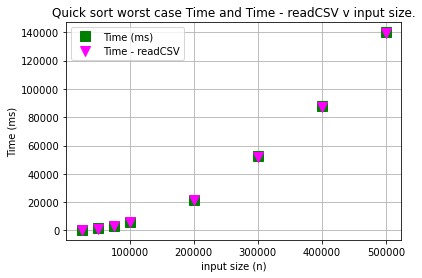

In [ ]:
#plt.figure(figsize=(10*1.2,7*1.2))

plt.plot(dfQuickMean16[dfQuickMean16["Input case"] == "worst"]["Size"], dfQuickMean16[dfQuickMean16["Input case"] == "worst"]["Time (ms)"],"s", color="green",markersize=10, label="Time (ms)")
plt.plot(dfQuickMean16[dfQuickMean16["Input case"] == "worst"]["Size"], dfQuickMean16[dfQuickMean16["Input case"] == "worst"]["Time - readCSV"],"v", color="fuchsia",markersize=10, label="Time - readCSV")

plt.title("Quick sort worst case Time and Time - readCSV v input size.")
plt.xlabel("input size (n)")
plt.ylabel("Time (ms)")
plt.grid()
plt.legend()
plt.show()

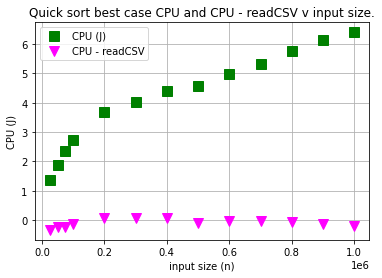

In [ ]:
#plt.figure(figsize=(10*1.2,7*1.2))
plt.plot(dfQuickMean16[dfQuickMean16["Input case"] == "best"]["Size"], dfQuickMean16[dfQuickMean16["Input case"] == "best"]["CPU (J)"],"s", color="green",markersize=10, label="CPU (J)")
plt.plot(dfQuickMean16[dfQuickMean16["Input case"] == "best"]["Size"], dfQuickMean16[dfQuickMean16["Input case"] == "best"]["CPU - readCSV"],"v", color="fuchsia",markersize=10, label="CPU - readCSV")

plt.title("Quick sort best case CPU and CPU - readCSV v input size.")
plt.xlabel("input size (n)")
plt.ylabel("CPU (J)")
plt.grid()
plt.legend()
plt.show()

random0 R2 0.8326497486565038  

random1 R2 0.724775465360041  

random2 R2 0.8146151730306059  

random3 R2 0.7672007525600258  

random4 R2 0.8697455109122313  

random5 R2 0.8453958160926645  

random6 R2 0.8390505853637797  

random7 R2 0.7789930363300684  

random8 R2 0.8908291899106054  

random9 R2 0.889239969513075  

best R2  0.3479296344770416 



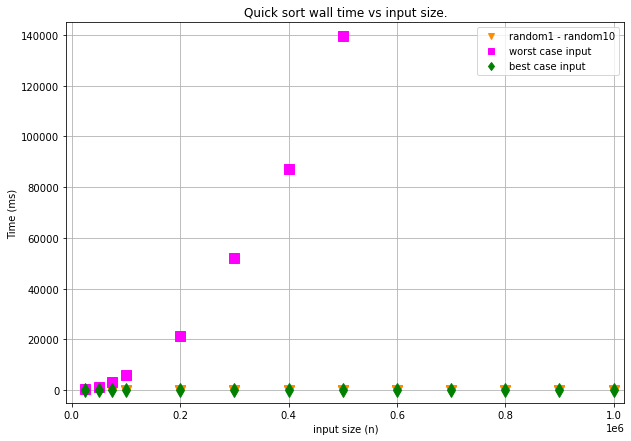

In [ ]:
plt.figure(figsize=(10,7))
color = "red"

Rs = []

for i in range(1,11):
    Rs.append(polyReg(dfQuickMean16[dfQuickMean16["Input case"] == f"random{i}"]["Size"], dfQuickMean16[dfQuickMean16["Input case"] == f"random{i}"]["Time - readCSV"],1, f"random{i} case input", "darkorange",dots="v", regLine=False))
plt.plot(-100000,-100000,"v", color="darkorange",label="random1 - random10")
for i in range(len(Rs)):
    print(f"random{i} R2", Rs[i][1], " \n")
worst = polyReg(dfQuickMean16[dfQuickMean16["Input case"] == "worst"]["Size"], dfQuickMean16[dfQuickMean16["Input case"] == "worst"]["Time - readCSV"],1, "Merge time for worst case input", "fuchsia",dots="s", regLine=False)
plt.plot(-100000,-100000,"s", color="fuchsia",label="worst case input")
best = polyReg(dfQuickMean16[dfQuickMean16["Input case"] == "best"]["Size"], dfQuickMean16[dfQuickMean16["Input case"] == "best"]["Time - readCSV"],1, "Merge time for best case input", "green",dots="d", regLine=False)
plt.plot(-100000,-100000,"d", color="green",label="best case input")
#print(f"worst R2 ", worst[1], "\n")
print(f"best R2 ", best[1], "\n")
plt.title("Quick sort wall time vs input size.")
plt.xlabel("input size (n)")
plt.ylabel("Time (ms)")
plt.xlim(-10000, 1020000)
plt.ylim(-5000, 145000)
plt.grid()
plt.legend()
plt.show()


random0 R2 0.8326497486565038  

random1 R2 0.724775465360041  

random2 R2 0.8146151730306059  

random3 R2 0.7672007525600258  

random4 R2 0.8697455109122313  

random5 R2 0.8453958160926645  

random6 R2 0.8390505853637797  

random7 R2 0.7789930363300684  

random8 R2 0.8908291899106054  

random9 R2 0.889239969513075  

best R2  0.3479296344770416 



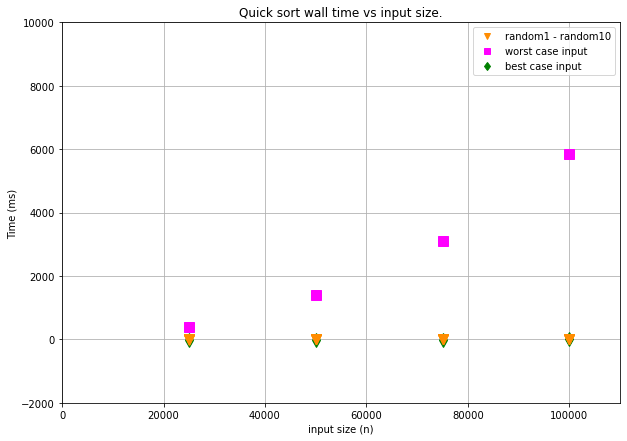

In [ ]:
plt.figure(figsize=(10,7))
color = "red"

Rs = []

best = polyReg(dfQuickMean16[dfQuickMean16["Input case"] == "best"]["Size"], dfQuickMean16[dfQuickMean16["Input case"] == "best"]["Time - readCSV"],1, "Merge time for best case input", "green",dots="d", regLine=False)
for i in range(1,11):
    Rs.append(polyReg(dfQuickMean16[dfQuickMean16["Input case"] == f"random{i}"]["Size"], dfQuickMean16[dfQuickMean16["Input case"] == f"random{i}"]["Time - readCSV"],1, f"random{i} case input", "darkorange",dots="v", regLine=False))
plt.plot(-1111110,0,"v", color="darkorange",label="random1 - random10")
for i in range(len(Rs)):
    print(f"random{i} R2", Rs[i][1], " \n")
worst = polyReg(dfQuickMean16[dfQuickMean16["Input case"] == "worst"]["Size"], dfQuickMean16[dfQuickMean16["Input case"] == "worst"]["Time - readCSV"],1, "Merge time for worst case input", "fuchsia",dots="s", regLine=False)
plt.plot(-1111110,0,"s", color="fuchsia",label="worst case input")
plt.plot(-1111110,0,"d", color="green",label="best case input")
#print(f"worst R2 ", worst[1], "\n")
print(f"best R2 ", best[1], "\n")
plt.title("Quick sort wall time vs input size.")
plt.xlabel("input size (n)")
plt.ylabel("Time (ms)")
plt.grid()
plt.xlim(-0.05,110000)
plt.ylim(-2000,10000)
plt.legend()
plt.show()


random0 R2 0.8326497486565038  

random1 R2 0.724775465360041  

random2 R2 0.8146151730306059  

random3 R2 0.7672007525600258  

random4 R2 0.8697455109122313  

random5 R2 0.8453958160926645  

random6 R2 0.8390505853637797  

random7 R2 0.7789930363300684  

random8 R2 0.8908291899106054  

random9 R2 0.889239969513075  

best R2  0.3479296344770416 



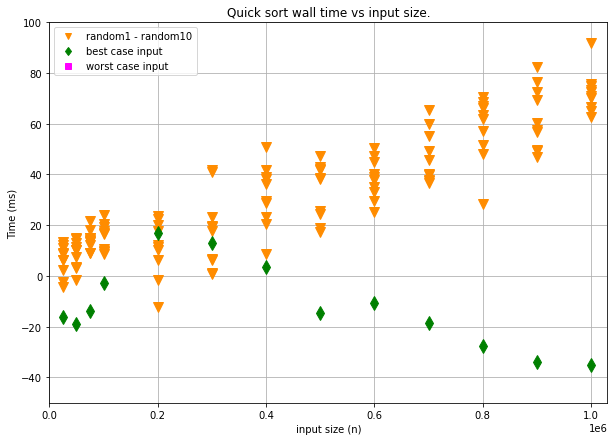

In [ ]:
plt.figure(figsize=(10,7))
color = "red"
plt.plot(0,-111110,"v", color="darkorange",label="random1 - random10")
plt.plot(0,-1111100,"d", color="green",label="best case input")
plt.plot(0,-1111100,"s", color="fuchsia",label="worst case input")

Rs = []

for i in range(1,11):
    Rs.append(polyReg(dfQuickMean16[dfQuickMean16["Input case"] == f"random{i}"]["Size"], dfQuickMean16[dfQuickMean16["Input case"] == f"random{i}"]["Time - readCSV"],1, f"random{i} case input", "darkorange",dots="v", regLine=False))
for i in range(len(Rs)):
    print(f"random{i} R2", Rs[i][1], " \n")
#worst = polyReg(dfQuickMean16[dfQuickMean16["Input case"] == "worst"]["Size"], dfQuickMean16[dfQuickMean16["Input case"] == "worst"]["Time - readCSV"],1, "Merge time for worst case input", "fuchsia",dots="s", regLine=False)
best = polyReg(dfQuickMean16[dfQuickMean16["Input case"] == "best"]["Size"], dfQuickMean16[dfQuickMean16["Input case"] == "best"]["Time - readCSV"],1, "Merge time for best case input", "green",dots="d", regLine=False)
#print(f"worst R2 ", worst[1], "\n")
print(f"best R2 ", best[1], "\n")
plt.title("Quick sort wall time vs input size.")
plt.xlabel("input size (n)")
plt.ylabel("Time (ms)")
plt.grid()
plt.legend()
plt.xlim(-10,1030000)
plt.ylim(-50,100)
plt.show()


# SQ 2: Time vs. big-oh

random0 R2 0.8361644601783071  

random1 R2 0.7261446590307317  

random2 R2 0.823816377348674  

random3 R2 0.765435131613156  

random4 R2 0.8721815972468088  

random5 R2 0.8543616295268694  

random6 R2 0.8352971778095821  

random7 R2 0.7881384982655522  

random8 R2 0.8947805624917596  

random9 R2 0.8933991180537205  

best R2  0.3662436331363116 



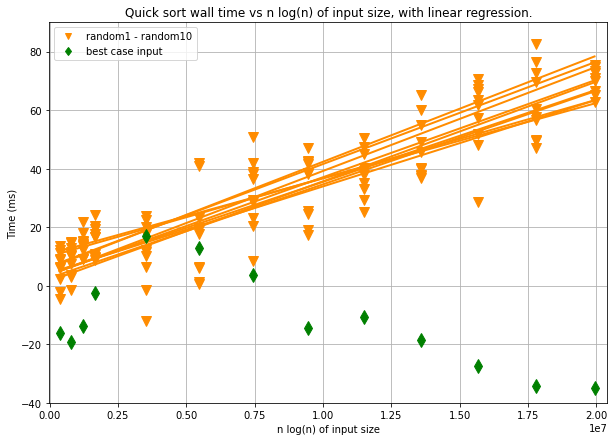

In [ ]:
plt.figure(figsize=(10,7))
color = "red"

Rs = []

for i in range(1,11):
    Rs.append(polyReg(dfQuickMean16[dfQuickMean16["Input case"] == f"random{i}"]["nlog(n)"], dfQuickMean16[dfQuickMean16["Input case"] == f"random{i}"]["Time - readCSV"],1, f"random{i} case input", "darkorange",dots="v"))
plt.plot(-1000000,0,"v", color="darkorange",label="random1 - random10")
for i in range(len(Rs)):
    print(f"random{i} R2", Rs[i][1], " \n")
#worst = polyReg(dfQuickMean16[dfQuickMean16["Input case"] == "worst"]["n^2"], dfQuickMean16[dfQuickMean16["Input case"] == "worst"]["Time - readCSV"],1, "Merge time for worst case input", "fuchsia",dots="s")
#plt.plot(0,0,"s", color="fuchsia",label="worst case input")
best = polyReg(dfQuickMean16[dfQuickMean16["Input case"] == "best"]["nlog(n)"], dfQuickMean16[dfQuickMean16["Input case"] == "best"]["Time - readCSV"],1, "Merge time for best case input", "green",dots="d", regLine=False)
plt.plot(-1000000,0,"d", color="green",label="best case input")
#print(f"worst R2 ", worst[1], "\n")
print(f"best R2 ", best[1], "\n")
plt.title("Quick sort wall time vs n log(n) of input size, with linear regression.")
plt.xlabel("n log(n) of input size")
plt.ylabel("Time (ms)")
plt.xlim(-10000, 20400000)
plt.ylim(-40,90)
plt.grid()
plt.legend()
plt.show()


worst R2  0.9995215031947976 



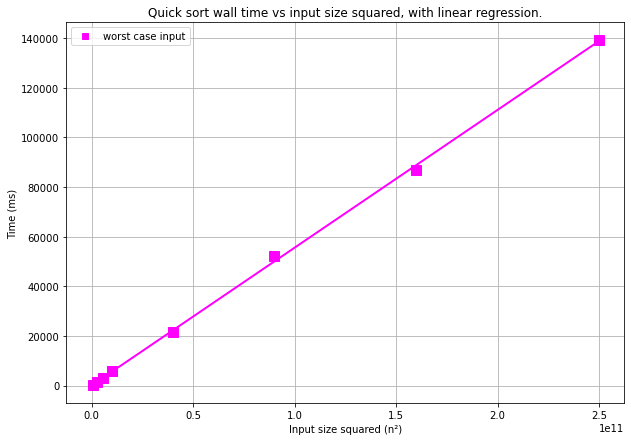

In [ ]:
plt.figure(figsize=(10,7))
color = "red"

Rs = []

# for i in range(1,11):
#     Rs.append(polyReg(dfQuickMean16[dfQuickMean16["Input case"] == f"random{i}"]["nlog(n)"], dfQuickMean16[dfQuickMean16["Input case"] == f"random{i}"]["Time - readCSV"],1, f"random{i} case input", "darkorange",dots="v"))
# plt.plot(0,0,"v", color="darkorange",label="All random case inputs")
# for i in range(len(Rs)):
#     print(f"random{i} R2", Rs[i][1], " \n")
worst = polyReg(dfQuickMean16[dfQuickMean16["Input case"] == "worst"]["n^2"], dfQuickMean16[dfQuickMean16["Input case"] == "worst"]["Time - readCSV"],1, "Merge time for worst case input", "fuchsia",dots="s")
plt.plot(0,0,"s", color="fuchsia",label="worst case input")
# best = polyReg(dfQuickMean16[dfQuickMean16["Input case"] == "best"]["nlog(n)"], dfQuickMean16[dfQuickMean16["Input case"] == "best"]["Time - readCSV"],1, "Merge time for best case input", "green",dots="d")
# plt.plot(0,0,"d", color="green",label="best case input")
print(f"worst R2 ", worst[1], "\n")
#print(f"best R2 ", best[1], "\n")
plt.title("Quick sort wall time vs input size squared, with linear regression.")
plt.xlabel("Input size squared (n\u00b2)")
plt.ylabel("Time (ms)")
plt.grid()
plt.legend()
plt.show()


# E v. T

random0 R2 0.5966727910041579  

random1 R2 0.7986648190449681  

random2 R2 0.8573212944537318  

random3 R2 0.703937097407072  

random4 R2 0.8408605293948359  

random5 R2 0.8781077402390047  

random6 R2 0.8903086629124703  

random7 R2 0.82173496746137  

random8 R2 0.8593922943306744  

random9 R2 0.9174062524303755  



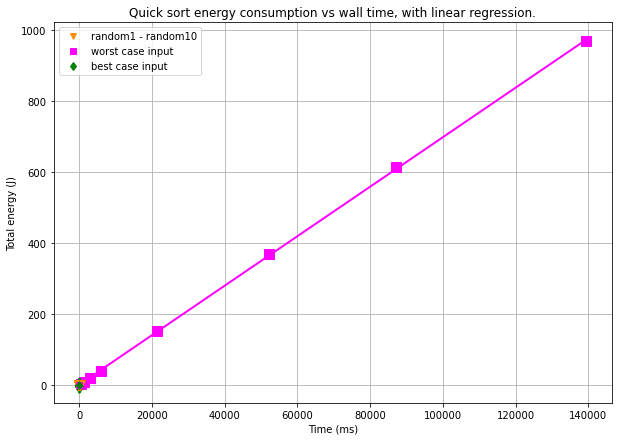

In [ ]:
plt.figure(figsize=(10,7))
color = "red"

Rs = []

worst = polyReg(dfQuickMean16[dfQuickMean16["Input case"] == "worst"]["Time - readCSV"], dfQuickMean16[dfQuickMean16["Input case"] == "worst"]["full EC"],1, "Merge time for worst case input", "fuchsia",dots="s")
best = polyReg(dfQuickMean16[dfQuickMean16["Input case"] == "best"]["Time - readCSV"], dfQuickMean16[dfQuickMean16["Input case"] == "best"]["full EC"],1, "Merge time for best case input", "green",dots="d")
for i in range(1,11):
    Rs.append(polyReg(dfQuickMean16[dfQuickMean16["Input case"] == f"random{i}"]["Time - readCSV"], dfQuickMean16[dfQuickMean16["Input case"] == f"random{i}"]["full EC"],1, f"Random{i} case input", "darkorange",dots="v"))
plt.plot(0,0,"v", color="darkorange",label="random1 - random10")
for i in range(len(Rs)):
    print(f"random{i} R2", Rs[i][1], " \n")
plt.plot(0,0,"s", color="fuchsia",label="worst case input")
# print(f"worst R2 ", worst[1], "\n")
plt.plot(0,0,"d", color="green",label="best case input")
#print(f"best R2 ", best[1], "\n")
plt.title("Quick sort energy consumption vs wall time, with linear regression.")
plt.ylabel("Total energy (J)")
plt.xlabel("Time (ms)")
plt.legend()
plt.grid()
plt.show()


random0 R2 0.5966727910041579  

random1 R2 0.7986648190449681  

random2 R2 0.8573212944537318  

random3 R2 0.703937097407072  

random4 R2 0.8408605293948359  

random5 R2 0.8781077402390047  

random6 R2 0.8903086629124703  

random7 R2 0.82173496746137  

random8 R2 0.8593922943306744  

random9 R2 0.9174062524303755  



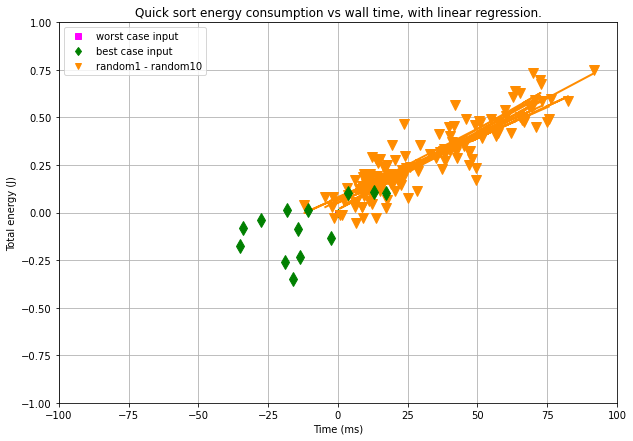

In [ ]:
plt.figure(figsize=(10,7))
color = "red"

Rs = []

plt.plot(0,0,"s", color="fuchsia",label="worst case input")
# print(f"worst R2 ", worst[1], "\n")
plt.plot(0,0,"d", color="green",label="best case input")
plt.plot(0,0,"v", color="darkorange",label="random1 - random10")
worst = polyReg(dfQuickMean16[dfQuickMean16["Input case"] == "worst"]["Time - readCSV"], dfQuickMean16[dfQuickMean16["Input case"] == "worst"]["full EC"],1, "Merge time for worst case input", "fuchsia",dots="s")
for i in range(1,11):
    Rs.append(polyReg(dfQuickMean16[dfQuickMean16["Input case"] == f"random{i}"]["Time - readCSV"], dfQuickMean16[dfQuickMean16["Input case"] == f"random{i}"]["full EC"],1, f"Random{i} case input", "darkorange",dots="v"))
for i in range(len(Rs)):
    print(f"random{i} R2", Rs[i][1], " \n")
best = polyReg(dfQuickMean16[dfQuickMean16["Input case"] == "best"]["Time - readCSV"], dfQuickMean16[dfQuickMean16["Input case"] == "best"]["full EC"],1, "Merge time for best case input", "green",dots="d")
#print(f"best R2 ", best[1], "\n")
plt.title("Quick sort energy consumption vs wall time, with linear regression.")
plt.ylabel("Total energy (J)")
plt.xlabel("Time (ms)")
plt.legend()
plt.grid()
plt.xlim(-100,100)
plt.ylim(-1,1)
plt.show()


random0 R2 0.5966727910041579  

random1 R2 0.7986648190449681  

random2 R2 0.8573212944537318  

random3 R2 0.703937097407072  

random4 R2 0.8408605293948359  

random5 R2 0.8781077402390047  

random6 R2 0.8903086629124703  

random7 R2 0.82173496746137  

random8 R2 0.8593922943306744  

random9 R2 0.9174062524303755  

best R2  0.31193731085617493 



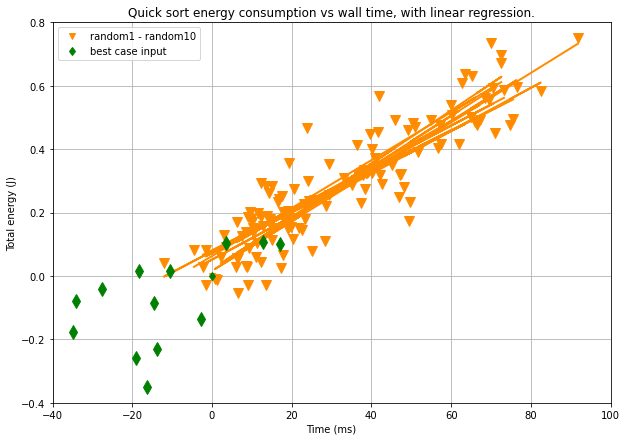

In [ ]:
plt.figure(figsize=(10,7))
color = "red"

Rs = []

worst = polyReg(dfQuickMean16[dfQuickMean16["Input case"] == "worst"]["Time - readCSV"], dfQuickMean16[dfQuickMean16["Input case"] == "worst"]["full EC"],1, "Merge time for worst case input", "fuchsia",dots="s")
for i in range(1,11):
    Rs.append(polyReg(dfQuickMean16[dfQuickMean16["Input case"] == f"random{i}"]["Time - readCSV"], dfQuickMean16[dfQuickMean16["Input case"] == f"random{i}"]["full EC"],1, f"Random{i} case input", "darkorange",dots="v"))
plt.plot(0,0,"v", color="darkorange",label="random1 - random10")
for i in range(len(Rs)):
    print(f"random{i} R2", Rs[i][1], " \n")
#plt.plot(0,0,"s", color="fuchsia",label="worst case input")
# print(f"worst R2 ", worst[1], "\n")
plt.plot(0,0,"d", color="green",label="best case input")
best = polyReg(dfQuickMean16[dfQuickMean16["Input case"] == "best"]["Time - readCSV"], dfQuickMean16[dfQuickMean16["Input case"] == "best"]["full EC"],1, "Merge time for best case input", "green",dots="d",regLine=False)
print(f"best R2 ", best[1], "\n")
plt.title("Quick sort energy consumption vs wall time, with linear regression.")
plt.ylabel("Total energy (J)")
plt.xlabel("Time (ms)")
plt.legend(loc ="upper left")
plt.grid()
plt.xlim(-40,100)
plt.ylim(-.4,.8)
plt.show()


# EC v. big-oh

random0 R2 0.30947824540025604  

random1 R2 0.4380777243698627  

random2 R2 0.643014510959873  

random3 R2 0.34009435767060736  

random4 R2 0.5705667880060065  

random5 R2 0.836410023797429  

random6 R2 0.6570670569637458  

random7 R2 0.5370317451314811  

random8 R2 0.7283620780300608  

random9 R2 0.7456649378067556  

worst R2  0.9995230748383086 

best R2  0.07534386248764635 



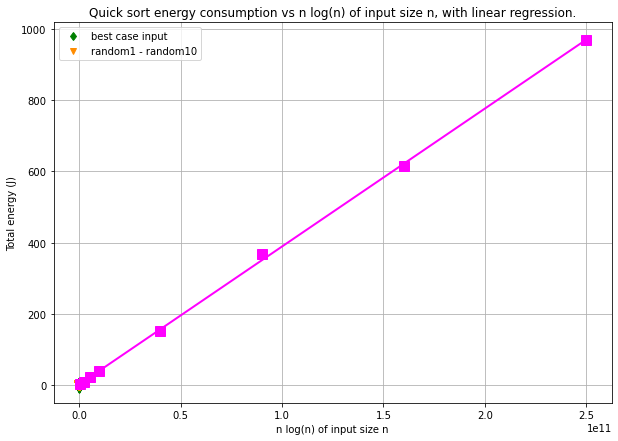

In [ ]:
plt.figure(figsize=(10,7))
color = "red"

Rs = []

best = polyReg(dfQuickMean16[dfQuickMean16["Input case"] == "best"]["nlog(n)"], dfQuickMean16[dfQuickMean16["Input case"] == "best"]["full EC"],1, "Merge time for best case input", "green",dots="d",regLine=False)
plt.plot(0000,0000,"d", color="green",label="best case input")
for i in range(1,11):
    Rs.append(polyReg(dfQuickMean16[dfQuickMean16["Input case"] == f"random{i}"]["nlog(n)"], dfQuickMean16[dfQuickMean16["Input case"] == f"random{i}"]["full EC"],1, f"random{i} case input", "darkorange",dots="v"))
plt.plot(0000,0000,"v", color="darkorange",label="random1 - random10")
for i in range(len(Rs)):
    print(f"random{i} R2", Rs[i][1], " \n")
worst = polyReg(dfQuickMean16[dfQuickMean16["Input case"] == "worst"]["n^2"], dfQuickMean16[dfQuickMean16["Input case"] == "worst"]["full EC"],1, "Merge time for worst case input", "fuchsia",dots="s")
#plt.plot(0000,0000,"s", color="fuchsia",label="worst case input")
print(f"worst R2 ", worst[1], "\n")
print(f"best R2 ", best[1], "\n")
plt.title("Quick sort energy consumption vs n log(n) of input size n, with linear regression.")
plt.xlabel("n log(n) of input size n")
plt.ylabel("Total energy (J)")
plt.grid()
plt.legend()
plt.show()

random0 R2 0.30947824540025604  

random1 R2 0.4380777243698627  

random2 R2 0.643014510959873  

random3 R2 0.34009435767060736  

random4 R2 0.5705667880060065  

random5 R2 0.836410023797429  

random6 R2 0.6570670569637458  

random7 R2 0.5370317451314811  

random8 R2 0.7283620780300608  

random9 R2 0.7456649378067556  

worst R2  0.9578389457189592 

best R2  0.07534386248764635 



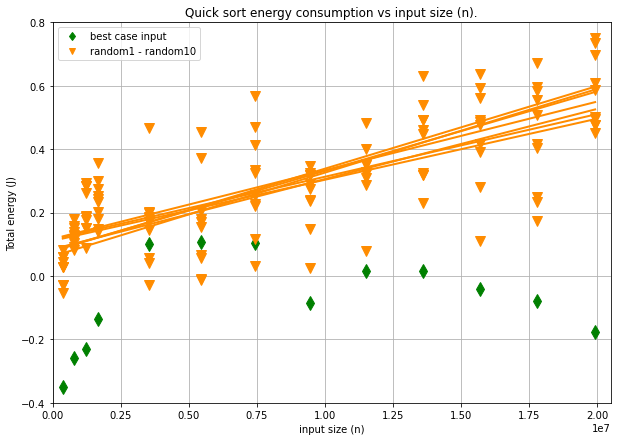

In [ ]:
plt.figure(figsize=(10,7))
color = "red"

Rs = []

best = polyReg(dfQuickMean16[dfQuickMean16["Input case"] == "best"]["nlog(n)"], dfQuickMean16[dfQuickMean16["Input case"] == "best"]["full EC"],1, "Merge time for best case input", "green",dots="d",regLine=False)
plt.plot(-1000000,0000,"d", color="green",label="best case input")
for i in range(1,11):
    Rs.append(polyReg(dfQuickMean16[dfQuickMean16["Input case"] == f"random{i}"]["nlog(n)"], dfQuickMean16[dfQuickMean16["Input case"] == f"random{i}"]["full EC"],1, f"random{i} case input", "darkorange",dots="v",regLine=True))
plt.plot(-1000000,0000,"v", color="darkorange",label="random1 - random10")
for i in range(len(Rs)):
    print(f"random{i} R2", Rs[i][1], " \n")
worst = polyReg(dfQuickMean16[dfQuickMean16["Input case"] == "worst"]["nlog(n)"], dfQuickMean16[dfQuickMean16["Input case"] == "worst"]["full EC"],1, "Merge time for worst case input", "fuchsia",dots="s",regLine=False)
#plt.plot(0000,0000,"s", color="fuchsia",label="worst case input")
print(f"worst R2 ", worst[1], "\n")
print(f"best R2 ", best[1], "\n")
plt.title("Quick sort energy consumption vs input size (n).")
plt.xlabel("input size (n)")
plt.ylabel("Total energy (J)")
plt.grid()
plt.xlim(-10000,20500000)
plt.ylim(-0.4, 0.8)
plt.legend()
plt.show()

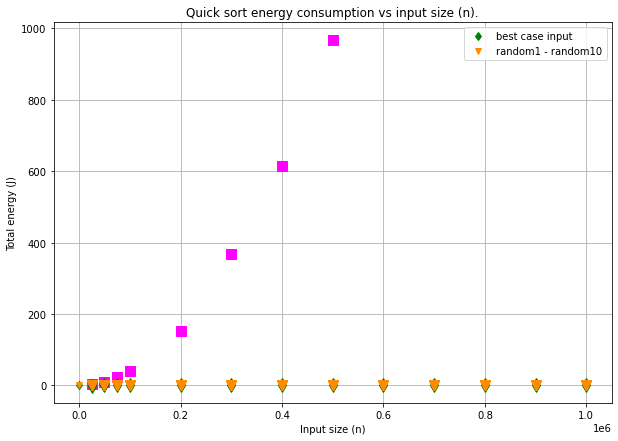

In [ ]:
plt.figure(figsize=(10,7))
color = "red"

Rs = []

worst = polyReg(dfQuickMean16[dfQuickMean16["Input case"] == "worst"]["Size"], dfQuickMean16[dfQuickMean16["Input case"] == "worst"]["full EC"],1, "Merge time for worst case input", "fuchsia",dots="s",regLine=False)
best = polyReg(dfQuickMean16[dfQuickMean16["Input case"] == "best"]["Size"], dfQuickMean16[dfQuickMean16["Input case"] == "best"]["full EC"],1, "Merge time for best case input", "green",dots="d",regLine=False)
plt.plot(0000,0000,"d", color="green",label="best case input")
for i in range(1,11):
    Rs.append(polyReg(dfQuickMean16[dfQuickMean16["Input case"] == f"random{i}"]["Size"], dfQuickMean16[dfQuickMean16["Input case"] == f"random{i}"]["full EC"],1, f"random{i} case input", "darkorange",dots="v",regLine=False))
plt.plot(0000,0000,"v", color="darkorange",label="random1 - random10")
# for i in range(len(Rs)):
#     print(f"random{i} R2", Rs[i][1], " \n")
#plt.plot(0000,0000,"s", color="fuchsia",label="worst case input")
# print(f"worst R2 ", worst[1], "\n")
# print(f"best R2 ", best[1], "\n")
plt.title("Quick sort energy consumption vs input size (n).")
plt.xlabel("Input size (n)")
plt.ylabel("Total energy (J)")
plt.grid()
plt.legend()
plt.show()

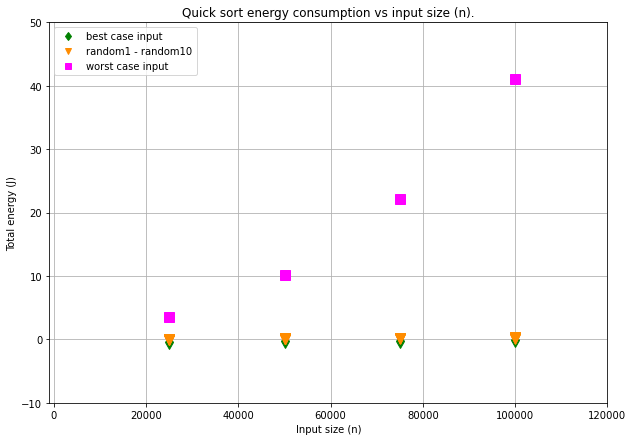

In [ ]:
plt.figure(figsize=(10,7))
color = "red"

Rs = []

best = polyReg(dfQuickMean16[dfQuickMean16["Input case"] == "best"]["Size"], dfQuickMean16[dfQuickMean16["Input case"] == "best"]["full EC"],1, "Merge time for best case input", "green",dots="d",regLine=False)
plt.plot(-10000,0000,"d", color="green",label="best case input")
for i in range(1,11):
    Rs.append(polyReg(dfQuickMean16[dfQuickMean16["Input case"] == f"random{i}"]["Size"], dfQuickMean16[dfQuickMean16["Input case"] == f"random{i}"]["full EC"],1, f"random{i} case input", "darkorange",dots="v",regLine=False))
plt.plot(-10000,0000,"v", color="darkorange",label="random1 - random10")
# for i in range(len(Rs)):
#     print(f"random{i} R2", Rs[i][1], " \n")
worst = polyReg(dfQuickMean16[dfQuickMean16["Input case"] == "worst"]["Size"], dfQuickMean16[dfQuickMean16["Input case"] == "worst"]["full EC"],1, "Merge time for worst case input", "fuchsia",dots="s",regLine=False)
plt.plot(-10000,0000,"s", color="fuchsia",label="worst case input")
# print(f"worst R2 ", worst[1], "\n")
# print(f"best R2 ", best[1], "\n")
plt.title("Quick sort energy consumption vs input size (n).")
plt.xlabel("Input size (n)")
plt.ylabel("Total energy (J)")
plt.grid()
plt.xlim(-1000, 120000)
plt.ylim(-10,50)
plt.legend()
plt.show()

worst R2  0.9995230748383086 



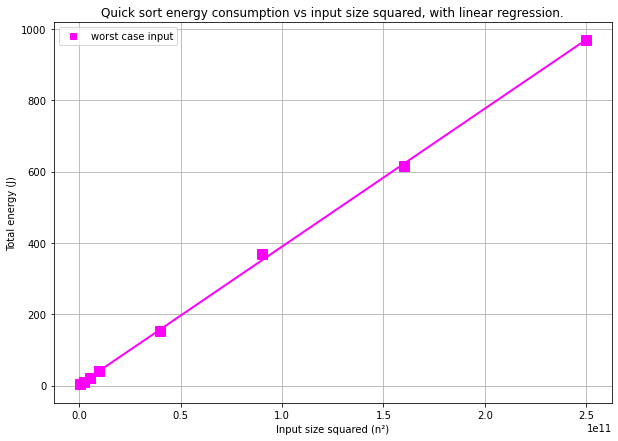

In [ ]:
plt.figure(figsize=(10,7))
color = "red"

Rs = []

# best = polyReg(dfQuickMean16[dfQuickMean16["Input case"] == "best"]["nlog(n)"], dfQuickMean16[dfQuickMean16["Input case"] == "best"]["full EC"],1, "Merge time for best case input", "green",dots="d")
# plt.plot(0000,0000,"d", color="green",label="best case input")
# for i in range(1,11):
#     Rs.append(polyReg(dfQuickMean16[dfQuickMean16["Input case"] == f"random{i}"]["nlog(n)"], dfQuickMean16[dfQuickMean16["Input case"] == f"random{i}"]["full EC"],1, f"random{i} case input", "darkorange",dots="v"))
# plt.plot(0000,0000,"v", color="darkorange",label="countingrandom1 - countingrandom10")
# for i in range(len(Rs)):
#     print(f"random{i} R2", Rs[i][1], " \n")
worst = polyReg(dfQuickMean16[dfQuickMean16["Input case"] == "worst"]["n^2"], dfQuickMean16[dfQuickMean16["Input case"] == "worst"]["full EC"],1, "Merge time for worst case input", "fuchsia",dots="s")
plt.plot(0000,0000,"s", color="fuchsia",label="worst case input")
print(f"worst R2 ", worst[1], "\n")
#print(f"best R2 ", best[1], "\n")
plt.title("Quick sort energy consumption vs input size squared, with linear regression.")
plt.xlabel("Input size squared (n\u00b2)")
plt.ylabel("Total energy (J)")
plt.grid()

plt.legend()
plt.show()

worst R2  0.9995230748383086 



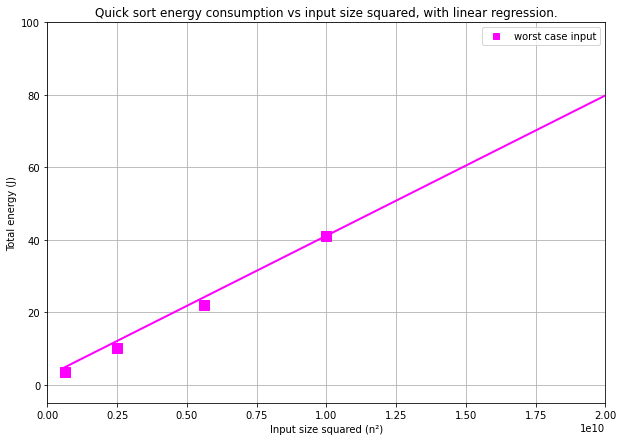

In [ ]:
plt.figure(figsize=(10,7))
color = "red"

Rs = []

# best = polyReg(dfQuickMean16[dfQuickMean16["Input case"] == "best"]["nlog(n)"], dfQuickMean16[dfQuickMean16["Input case"] == "best"]["full EC"],1, "Merge time for best case input", "green",dots="d")
# plt.plot(0000,0000,"d", color="green",label="best case input")
# for i in range(1,11):
#     Rs.append(polyReg(dfQuickMean16[dfQuickMean16["Input case"] == f"random{i}"]["nlog(n)"], dfQuickMean16[dfQuickMean16["Input case"] == f"random{i}"]["full EC"],1, f"random{i} case input", "darkorange",dots="v"))
# plt.plot(0000,0000,"v", color="darkorange",label="countingrandom1 - countingrandom10")
# for i in range(len(Rs)):
#     print(f"random{i} R2", Rs[i][1], " \n")
worst = polyReg(dfQuickMean16[dfQuickMean16["Input case"] == "worst"]["n^2"], dfQuickMean16[dfQuickMean16["Input case"] == "worst"]["full EC"],1, "Merge time for worst case input", "fuchsia",dots="s")
plt.plot(-100000000000,0000,"s", color="fuchsia",label="worst case input")
print(f"worst R2 ", worst[1], "\n")
#print(f"best R2 ", best[1], "\n")
plt.title("Quick sort energy consumption vs input size squared, with linear regression.")
plt.xlabel("Input size squared (n\u00b2)")
plt.ylabel("Total energy (J)")
plt.grid()
plt.xlim(-400000,20000000000)
plt.ylim(-5,100)
plt.legend()
plt.show()